## Exploring the Acceptance Criteria - 

Calculate the probability of accepting a Monte Carlo move for energies ranging from -2 to 2 for T = 0.9, T = 0.4, and T = 1.4. What is the effect of temperature on the probability of a MC move being accepted? Create a plot showing your results. Note that you aren’t going to be able to use your function accept_or_reject for this. You will have to take p_acc out of it to make the plot.

In [13]:
import math

import random

def calculate_total_energy(coordinates, box_length, cutoff):
    
    total_energy = 0
    num_atoms = len(coordinates)

    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            # Calculate the distance between the particles - exercise.
            dist_ij = calculate_distance(coordinates[i], coordinates[j], box_length)

            if dist_ij < cutoff:
                # Calculate the pairwise LJ energy
                LJ_ij = calculate_LJ(dist_ij)

                # Add to total energy.
                total_energy += LJ_ij
    return total_energy

def read_xyz(filepath):
    
    with open(filepath) as f:
        box_length = float(f.readline().split()[0])
        num_atoms = float(f.readline())
        coordinates = f.readlines()
    
    atomic_coordinates = []
    
    for atom in coordinates:
        split_atoms = atom.split()
        
        float_coords = []
        
        # We split this way to get rid of the atom label.
        for coord in split_atoms[1:]:
            float_coords.append(float(coord))
            
        atomic_coordinates.append(float_coords)
        
    return atomic_coordinates, box_length

def calculate_LJ(r_ij):
   
    
    
    r6_term = math.pow(1/r_ij, 6)
    r12_term = math.pow(r6_term, 2)
    
    pairwise_energy = 4 * (r12_term - r6_term)
    
    return pairwise_energy


## Add your group's modified calculate_distance function
def calculate_distance(coord1, coord2, box_length=None):
   
    distance = 0
    
    for i in range(3):
        dim_dist = (coord1[i] - coord2[i])
        if box_length:
            dim_dist = (dim_dist - box_length * round(dim_dist/ box_length))**2
        distance += dim_dist
        
        
    distance = math.sqrt(distance)
    
    return distance


## Add your group's tail correction function
import os

config1_file = os.path.join("../lj_sample_configurations", "lj_sample_config_periodic1.txt")

sample_coords, box_length = read_xyz(config1_file)

print(box_length)

print(len(sample_coords))

def calculate_tail_correction(n,b,r_c):
    r3_term = math.pow(1/r_c, 3)
    r9_term = (1/3) * (math.pow(r3_term, 9))
    NV_term = (8*math.pi/3) * ((n**2)/(b**3))
    tail_correction = NV_term * (r9_term - r3_term)
    
    return tail_correction



def accept_or_reject(delta_U, beta):
    if delta_U <= 0.0:
        accept = True
    else:
        #Gen random number on(0,1)
        random_number = random.random()
        p_acc = math.exp(-beta*delta_U)
        
        if random_number < p_acc:
            accept = True
        else:
            accept = False   
    
    return accept





10.0
800


In [14]:
#Test cases negative delta energy
# Beta equals 1/T
#T = 0.9, T = 0.4, and T = 1.4

delta_energy = -2
beta = 1/0.9

accepted = accept_or_reject(delta_energy, beta)

assert accepted is True

delta_energy = -2
beta = 1/0.4

accepted = accept_or_reject(delta_energy, beta)

assert accepted is True

delta_energy = -2
beta = 1/1.4

accepted = accept_or_reject(delta_energy, beta)

assert accepted is True

In [16]:
#Test case for positive delta energy
#T = 0.9, T = 0.4, and T = 1.4

delta_energy = 2
beta = 1/0.9
random.seed(0)

accepted = accept_or_reject(delta_energy, beta)

assert accepted is False

delta_energy = 2
beta = 1/0.4
random.seed(0)

accepted = accept_or_reject(delta_energy, beta)

assert accepted is False

delta_energy = 2
beta = 1/1.4
random.seed(0)

accepted = accept_or_reject(delta_energy, beta)

assert accepted is False

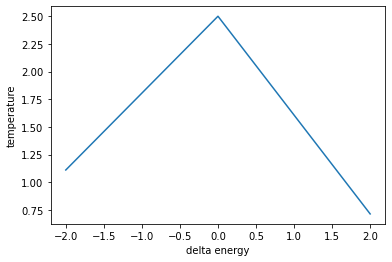

In [25]:
import matplotlib.pyplot as plt
plt.plot([-2,0,2] , [1/0.9, 1/0.4, 1/1.4])
plt.xlabel('delta energy')
plt.ylabel('temperature')
plt.show()


In [ ]:
energy_list = []
p_acc_list = []

for i in range(-10,11):
    #print("i = " , i)
    
    delta_U = i*0.2 
    p_acc = math.exp(-beta*delta_U)
    if p_acc > 1:
        p_acc = 1

    #print(p_acc)
    
    energy_list.append(delta_U)
    p_acc_list.append(p_acc)
    
    energy_list2 = []
    p_acc_list2 = []
    
    for i in range(-10,11):
        #print("i = " , i)

        delta_U = i*0.2 
        p_acc = math.exp(-beta*delta_U)
        if p_acc > 1:
            p_acc = 1

        energy_list2.append(delta_U)
        p_acc_list2.append(p_acc)

        energy_list3 = []
        p_acc_list3 = []
    
        for i in range(-10,11):
            #print("i = " , i)

            delta_U = i*0.2 
            p_acc = math.exp(-beta*delta_U)
            if p_acc > 1:
                p_acc = 1

            energy_list3.append(delta_U)
            p_acc_list3.append(p_acc)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(energy_list, p_acc_list, label = "line 1")
plt.plot(energy_list2, p_acc_list2, label = "line 2")
plt.plot(energy_list3, p_acc_list3, label = "line 3")

plt.legend()
plt.xlabel('delta energy')
plt.ylabel('prob acceptance')
plt.show()


import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [28]:
energy_list = []
p_acc_list = []

for i in range(-10,11):
    #print("i = " , i)
    
    delta_U = i*0.2 
    p_acc = math.exp(-beta*delta_U)
    if p_acc > 1:
        p_acc = 1

    #print(p_acc)
    
    energy_list.append(delta_U)
    p_acc_list.append(p_acc)
    
    print(energy_list)
    print(p_acc_list)

[-2.0]
[1]
[-2.0, -1.8]
[1, 1]
[-2.0, -1.8, -1.6]
[1, 1, 1]
[-2.0, -1.8, -1.6, -1.4000000000000001]
[1, 1, 1, 1]
[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002]
[1, 1, 1, 1, 1]
[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0]
[1, 1, 1, 1, 1, 1]
[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0, -0.8]
[1, 1, 1, 1, 1, 1, 1]
[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0, -0.8, -0.6000000000000001]
[1, 1, 1, 1, 1, 1, 1, 1]
[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0, -0.8, -0.6000000000000001, -0.4]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0, -0.8, -0.6000000000000001, -0.4, -0.2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0, -0.8, -0.6000000000000001, -0.4, -0.2, 0.0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.0]
[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0, -0.8, -0.6000000000000001, -0.4

In [31]:
energy_list2 = []
p_acc_list2 = []

for i in range(-10,11):
        #print("i = " , i)

        delta_U = i*0.2 
        p_acc = math.exp(-beta*delta_U)
        if p_acc > 1:
            p_acc = 1

        energy_list2.append(delta_U)
        p_acc_list2.append(p_acc)

        
print(energy_list2)
print(p_acc_list2)

[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0, -0.8, -0.6000000000000001, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.0, 0.8668778997501816, 0.7514772930752859, 0.6514390575310556, 0.5647181220077592, 0.4895416595569531, 0.4243728456769499, 0.3678794411714422, 0.3189065573239704, 0.2764530466295643, 0.2396510364417758]


## Initial Configuration - 
So far we have only used an initial configuration from a file. Write a function which can generate initial system configurations from a number of particles and box size (you could choose to have the user specify density instead of box size if you wished). Make sure your function includes docstrings! You will need to generate random coordinates on the range (-box_length/2, box_length/2) to place the particles. You might want to check out other functions in the random library for this!

The function should return coordinates, box_length the same way our read_xyz function did so we can switch out the two without changing our code. - Write one function which places the specified number of particles randomly in the box.

##     Radial Distribution Function

Your homework is to calculate the radial distribution function for the final coordinates after 50,000 steps of MC simulation. You should pick another temperature to perform a second simulation and compare the two RDFs. A function for computing the RDF can be provided to you upon request, but it is a bonus if you write your own. You can see some instructions for writing calculating the RDF here. If you prefer to use the provided function, you can find it here.

## Bonus
Alternate Lattice Write a function called cubic_lattice which places a specified number of particles on a cubic lattice. The function should take a number of particles and a box length. You can turn in this assignment here. It is due August 18, 2021.

